In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

random_state = 44

In [36]:
df = pd.read_csv("features.csv", index_col=0)
df.dropna(inplace=True)
X = df.drop(columns=['malign', 'patient_name'])
y = df['malign']


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

array([[0.66872238, 0.32067174, 0.33801178, ..., 0.        , 0.        ,
        0.        ],
       [0.81503525, 0.43431311, 0.47255324, ..., 0.        , 0.        ,
        0.        ],
       [0.89418626, 0.43642804, 0.52003056, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.63515194, 0.17930703, 0.19413937, ..., 0.        , 0.        ,
        0.        ],
       [0.23890031, 0.14268305, 0.14697542, ..., 0.        , 0.        ,
        0.        ],
       [0.21205056, 0.08051066, 0.07892094, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)

In [39]:
clf = DecisionTreeClassifier(random_state=random_state, max_depth=100, min_samples_split=100, criterion='entropy')
clf = clf.fit(X_train, y_train)


In [40]:
print("Tree parameters: ", clf.get_params())
print("\n\nTree depth: ", clf.get_depth())

Tree parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'random_state': 44, 'splitter': 'best'}


Tree depth:  9


In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
y_pred_train = clf.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("F1 score:", f1_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))

Accuracy: 0.8589981447124304
F1 score: 0.6984126984126984
Precision: 0.8712871287128713
Recall: 0.5827814569536424


In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 score:", f1_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))

Accuracy: 0.8
F1 score: 0.509090909090909
Precision: 0.7368421052631579
Recall: 0.3888888888888889


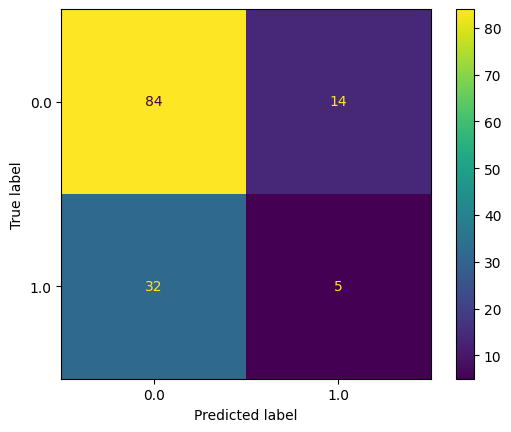

In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

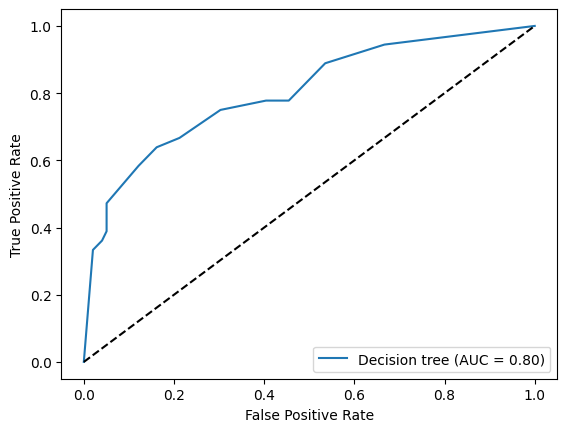

In [79]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


y_pred_proba = clf.predict_proba(X_val)
y_pred_proba = y_pred_proba[:, 1]


fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
data = {'fpr': fpr, 'trp': tpr, 'thresholds': thresholds}
df = pd.DataFrame(data)
df.head(100)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision tree')

display.plot()
# RocCurveDisplay.from_predictions(
#     y_val,
#     y_pred,
#     name=f"My threshold",
#     color="darkorange",
# )
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.show()

In [81]:
data = {'fpr': fpr, 'trp': tpr, 'thresholds': thresholds}
df = pd.DataFrame(data)
df.head(len(fpr))

,fpr,trp,thresholds
0,0.000000,0.000000,2.000000
1,0.020202,0.333333,1.000000
2,0.040404,0.361111,0.714286
3,0.050505,0.388889,0.703704
4,0.050505,0.444444,0.448276
5,0.050505,0.472222,0.397260
6,0.121212,0.583333,0.289474
7,0.161616,0.638889,0.280000
8,0.212121,0.666667,0.205882
9,0.272727,0.722222,0.173913


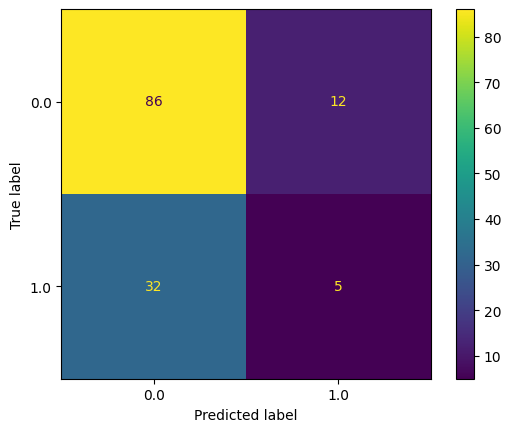

In [84]:
cm = confusion_matrix(y_test, y_pred_proba>0.71)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()